In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('sunny_cluster.csv')
df.head()

,Clearsky DHI,GHI,cluster,Temperature,Clearsky DNI,Relative Humidity,Wind Speed,DNI,Cloud Type,Clearsky GHI,DHI,Solar Zenith Angle
0,108,403,1,14.5,889,40.65,3.4,241,7,618,265,54.95
1,114,702,1,15.7,920,36.14,3.7,920,0,702,114,50.20
2,115,715,1,16.4,923,33.37,3.9,923,0,715,115,49.41
3,111,657,1,16.7,901,31.61,4.0,901,1,657,111,52.76
4,100,533,1,16.6,854,30.95,4.0,854,0,533,100,59.55


In [3]:
df.dropna(inplace=True)

In [4]:
df.drop(["cluster"],axis=1,inplace=True)

In [5]:
df.head()

,Clearsky DHI,GHI,Temperature,Clearsky DNI,Relative Humidity,Wind Speed,DNI,Cloud Type,Clearsky GHI,DHI,Solar Zenith Angle
0,108,403,14.5,889,40.65,3.4,241,7,618,265,54.95
1,114,702,15.7,920,36.14,3.7,920,0,702,114,50.20
2,115,715,16.4,923,33.37,3.9,923,0,715,115,49.41
3,111,657,16.7,901,31.61,4.0,901,1,657,111,52.76
4,100,533,16.6,854,30.95,4.0,854,0,533,100,59.55


In [6]:
df.describe()

,Clearsky DHI,GHI,Temperature,Clearsky DNI,Relative Humidity,Wind Speed,DNI,Cloud Type,Clearsky GHI,DHI,Solar Zenith Angle
count,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000
mean,196.069290,732.918872,28.169394,744.552228,23.098088,4.163022,722.517409,0.430362,744.193593,201.089833,40.970286
std,70.114563,193.575924,8.048195,134.986357,11.223323,1.540044,164.395314,1.591959,189.422882,73.647434,15.695106
min,79.000000,320.000000,7.500000,162.000000,4.460000,0.300000,17.000000,0.000000,358.000000,79.000000,5.210000
25%,148.000000,579.000000,21.200000,666.000000,15.297500,3.100000,644.000000,0.000000,600.000000,149.000000,30.105000
50%,181.000000,734.000000,29.500000,770.000000,20.280000,4.200000,760.000000,0.000000,746.000000,184.000000,44.480000
75%,225.000000,899.250000,35.200000,844.000000,29.010000,5.200000,839.000000,0.000000,908.000000,233.000000,53.142500
max,520.000000,1086.000000,44.000000,1008.000000,79.390000,8.700000,1008.000000,8.000000,1086.000000,520.000000,66.840000


In [7]:
s1= MinMaxScaler(feature_range=(-1,1))
Xs= s1.fit_transform(df)

In [8]:

s2=MinMaxScaler(feature_range=(-1,1))
Ys= s2.fit_transform(df[['GHI']])

In [9]:
Xs.shape

(2872, 11)

In [10]:
#Xs.reshape(1,662,6)

In [11]:
Ys.shape

(2872, 1)

In [12]:
window= 5
X=[]
Y=[]
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])

In [13]:
X,Y = np.array(X), np.array(Y)

In [14]:
X_train1, y_train1 = X[:2299], Y[:2299]
X_test1, y_test1 = X[2299:], Y[2299:]
X_train1.shape, y_train1.shape,X_test1.shape, y_test1.shape


((2299, 5, 11), (2299, 1), (568, 5, 11), (568, 1))

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import tensorflow as tf 
model= Sequential()
#model.add(LSTM(units=50,return_sequences=True,input_shape=(X.shape[1],X.shape[2])))  
#model.add(Dropout (0.2))
#model.add(LSTM(units=50,return_sequences=True))

#model.add(Dropout (0.2))
#model.add(LSTM(units=50))
#model.add(Dropout (0.2))
#model.add(Dense(units=1))
#model.compile(optimizer= 'adam',loss='mean_squared_error',metrics=['accuracy'])

# Adding the first LSTM layer and some Dropout regularisation
model.add(Bidirectional(LSTM(units = 72, activation='relu', return_sequences=True,input_shape=(X_train1.shape[1], X_train1.shape[2]))))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units = 96, activation='relu',return_sequences=True )))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units = 36, activation='relu',return_sequences=True )))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units = 84, activation='relu',return_sequences=True )))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units = 48, activation='relu',return_sequences=True )))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units = 120, activation='relu')))
model.add(Dropout(0.1))

# Adding the output layer
model.add(Dense(units = 10))    
model.add(Dense(units = 1))     

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [16]:
#from keras.callbacks import EarlyStopping
#earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=50)
import time 
start= time.time()
history=model.fit(X_train1,y_train1,epochs=60)
end= time.time()
continental= end-start

Epoch 1/60
72/72 [==============================] - 23s 54ms/step - loss: 0.1646 - root_mean_squared_error: 0.4058
Epoch 2/60
72/72 [==============================] - 4s 52ms/step - loss: 0.0523 - root_mean_squared_error: 0.2287
Epoch 3/60
72/72 [==============================] - 4s 55ms/step - loss: 0.0402 - root_mean_squared_error: 0.2006
Epoch 4/60
72/72 [==============================] - 4s 58ms/step - loss: 0.0309 - root_mean_squared_error: 0.1757
Epoch 5/60
72/72 [==============================] - 4s 56ms/step - loss: 0.0269 - root_mean_squared_error: 0.1641
Epoch 6/60
72/72 [==============================] - 4s 52ms/step - loss: 0.0254 - root_mean_squared_error: 0.1592
Epoch 7/60
72/72 [==============================] - 4s 50ms/step - loss: 0.0247 - root_mean_squared_error: 0.1570
Epoch 8/60
72/72 [==============================] - 4s 53ms/step - loss: 0.0258 - root_mean_squared_error: 0.1606
Epoch 9/60
72/72 [==============================] - 4s 52ms/step - loss: 0.0221 - root_

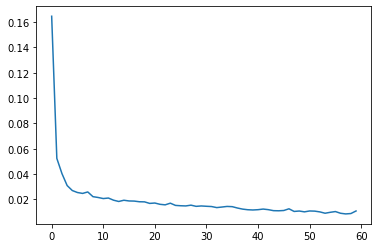

In [17]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [18]:
import time
start=time.time()
Yp= model.predict(X_test1)
end=time.time()
continental=end-start
print("inference time:",continental)
print(Yp)

18/18 [==============================] - 3s 17ms/step
inference time: 3.4050979614257812
[[ 0.09148978]
 [ 0.3771472 ]
 [ 0.58681667]
 [ 0.5530844 ]
 [ 0.31689408]
 [-0.04084682]
 [-0.562837  ]
 [-0.48813826]
 [ 0.04529364]
 [ 0.31391662]
 [ 0.5382178 ]
 [ 0.5276521 ]
 [ 0.2939083 ]
 [-0.03795511]
 [-0.56112945]
 [-0.4860974 ]
 [ 0.07751034]
 [ 0.33122796]
 [ 0.57556015]
 [ 0.57675385]
 [ 0.33510807]
 [-0.0051163 ]
 [-0.56964976]
 [-0.46647957]
 [ 0.04371523]
 [ 0.33436364]
 [ 0.53530836]
 [ 0.54115874]
 [ 0.33374077]
 [-0.02947285]
 [-0.5393202 ]
 [-0.4853954 ]
 [ 0.03776244]
 [ 0.37205997]
 [ 0.5510086 ]
 [ 0.53196746]
 [ 0.29776677]
 [-0.07431364]
 [-0.5587961 ]
 [-0.50292957]
 [ 0.02486348]
 [ 0.3582601 ]
 [ 0.54451215]
 [ 0.5289767 ]
 [ 0.2966135 ]
 [-0.08411885]
 [-0.56537485]
 [-0.5010537 ]
 [-0.00189222]
 [ 0.35482097]
 [ 0.54219097]
 [ 0.5240542 ]
 [ 0.2860764 ]
 [-0.1038536 ]
 [-0.5571249 ]
 [-0.50453967]
 [-0.01629162]
 [ 0.34421834]
 [ 0.53033614]
 [ 0.5022722 ]
 [ 0.245290

In [19]:
Yp.shape

(568, 1)

In [20]:
pred= s2.inverse_transform(Yp)

In [21]:
Actual= s2.inverse_transform(y_test1)

In [22]:
x= pred
z= Actual

In [23]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(z,x)
RMSE = math.sqrt(MSE)
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(z,x)
print("Root Mean Square Error:",RMSE)
print("Mean Square Error:", MSE)
print("Mean Absolute Error:",MAE)


Root Mean Square Error: 67.62709210444882
Mean Square Error: 4573.423586503604
Mean Absolute Error: 51.26971537630323


In [24]:
max= x.max()
min= x.min()
mean= x.mean()
max,min,mean

(927.7508, 440.85086, 679.4896)

In [25]:
NRMSE= (RMSE/(max-min))*100
NRMSE

13.889320482553732

In [26]:
Calculated =pd.DataFrame(x, columns = ['Prediction'])
Actual = pd.DataFrame(z, columns = ['Actual'])


In [27]:
Calculated.to_csv(r"E:\CatBoost_1\Johannesburg\GRU\Sunny hours\prediction.csv")

In [28]:
Actual.to_csv(r"E:\CatBoost_1\Johannesburg\GRU\Sunny hours\Actual.csv")